<a href="https://colab.research.google.com/github/tranvohuy/Enet-cityscapes/blob/master/Enet_cityscapes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reference:
- [Enet paper](https://arxiv.org/pdf/1606.02147.pdf), [github](https://github.com/e-lab/ENet-training)
- [cityscape datasets](https://cityscapes-dataset.com/downloads/)
- https://github.com/mcordts/cityscapesScripts
- [Kwotsin TensorFlow Enet github](https://github.com/kwotsin/TensorFlow-ENet)
- [Jasmine's thesis gihub](https://github.com/m273033/masters_thesis)
 - [semantic segmentation](https://github.com/m273033/masters_thesis/tree/master/semantic_segmentation) 
 
 Main code is from Kwotsin and Cityscapes, with some modification by Jasmin and myself.
 
 This Ipython notebook is set up such that you only need to hit ```run all``` with the exception that you have to provide username and password to download cityscapes' datasets.

# Things to do:
- Tensorboard
- check points
- Enet graph
- Transfer learning
- update deprecated modules

# Understanding Cityscapes dataset

See [github](https://github.com/tranvohuy/Enet-cityscapes/blob/master/understanding_cityscapes_dataset.md).

# Data pre-processing

### Sensitive information to download cityscape dataset

In [0]:
!wget --keep-session-cookies --save-cookies=cookies.txt --post-data 'username='xxx'&password='xxx'&submit=Login' https://www.cityscapes-dataset.com/login/

--2019-03-12 13:06:40--  https://www.cityscapes-dataset.com/login/
Resolving www.cityscapes-dataset.com (www.cityscapes-dataset.com)... 139.19.217.8
Connecting to www.cityscapes-dataset.com (www.cityscapes-dataset.com)|139.19.217.8|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.cityscapes-dataset.com/downloads/ [following]
--2019-03-12 13:06:41--  https://www.cityscapes-dataset.com/downloads/
Reusing existing connection to www.cityscapes-dataset.com:443.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘index.html’

index.html              [  <=>               ]  40.30K   177KB/s    in 0.2s    

2019-03-12 13:06:42 (177 KB/s) - ‘index.html’ saved [41268]



### The following block of codes is to download gtFine_trainvaltest.zip in cityscape

In [0]:
#https://towardsdatascience.com/download-city-scapes-dataset-with-script-3061f87b20d7
#The following block of codes is to download the gtFine_trainvaltest.zip
#Then unzip it

#!wget --keep-session-cookies --save-cookies=cookies.txt --post-data 'username='XXX'&password='XXX'&submit=Login' https://www.cityscapes-dataset.com/login/

!wget --load-cookies cookies.txt --content-disposition https://www.cityscapes-dataset.com/file-handling/?packageID=1
#!unzip gtFine_trainvaltest.zip

#This is faster to unzip
import os
import zipfile
file_name = 'gtFine_trainvaltest.zip'
with zipfile.ZipFile(os.path.join(os.getcwd(), file_name), 'r') as zip_ref:
    zip_ref.extractall()

#then remove the file
os.remove('gtFine_trainvaltest.zip')


--2019-03-12 13:06:48--  https://www.cityscapes-dataset.com/file-handling/?packageID=1
Resolving www.cityscapes-dataset.com (www.cityscapes-dataset.com)... 139.19.217.8
Connecting to www.cityscapes-dataset.com (www.cityscapes-dataset.com)|139.19.217.8|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 252567705 (241M) [application/octet-stream]
Saving to: ‘gtFine_trainvaltest.zip’

gtFine_trainvaltest 100%[===================>] 240.87M  25.8MB/s    in 10s     

2019-03-12 13:06:59 (23.5 MB/s) - ‘gtFine_trainvaltest.zip’ saved [252567705/252567705]



## Reduce number of classes

From cityscapes, there are 34 classes. We will use codes here to make png labelImages that encode 11 classes only. Just for curiosity.


### Label information

In [0]:
#labels.py
#https://github.com/mcordts/cityscapesScripts/blob/4b6e5154281617660d8347e6c7109686af239317/cityscapesscripts/helpers/labels.py
from __future__ import print_function, absolute_import, division
from collections import namedtuple


#--------------------------------------------------------------------------------
# Definitions
#--------------------------------------------------------------------------------

# a label and all meta information
Label = namedtuple( 'Label' , [

    'name'        , # The identifier of this label, e.g. 'car', 'person', ... .
                    # We use them to uniquely name a class

    'id'          , # An integer ID that is associated with this label.
                    # The IDs are used to represent the label in ground truth images
                    # An ID of -1 means that this label does not have an ID and thus
                    # is ignored when creating ground truth images (e.g. license plate).
                    # Do not modify these IDs, since exactly these IDs are expected by the
                    # evaluation server.

    'trainId'     , # Feel free to modify these IDs as suitable for your method. Then create
                    # ground truth images with train IDs, using the tools provided in the
                    # 'preparation' folder. However, make sure to validate or submit results
                    # to our evaluation server using the regular IDs above!
                    # For trainIds, multiple labels might have the same ID. Then, these labels
                    # are mapped to the same class in the ground truth images. For the inverse
                    # mapping, we use the label that is defined first in the list below.
                    # For example, mapping all void-type classes to the same ID in training,
                    # might make sense for some approaches.
                    # Max value is 255!

    'category'    , # The name of the category that this label belongs to

    'categoryId'  , # The ID of this category. Used to create ground truth images
                    # on category level.

    'hasInstances', # Whether this label distinguishes between single instances or not

    'ignoreInEval', # Whether pixels having this class as ground truth label are ignored
                    # during evaluations or not

    'color'       , # The color of this label
    ] )


#--------------------------------------------------------------------------------
# A list of all labels
#--------------------------------------------------------------------------------

# Please adapt the train IDs as appropriate for your approach.
# Note that you might want to ignore labels with ID 255 during training.
# Further note that the current train IDs are only a suggestion. You can use whatever you like.
# Make sure to provide your results using the original IDs and not the training IDs.
# Note that many IDs are ignored in evaluation and thus you never need to predict these!

## There are 11 different trainId in this notebook

labels = [
    #       name                     id    trainId   category            catId     hasInstances   ignoreInEval   color
    Label(  'unlabeled'            ,  0 ,      10 , 'void'            , 0       , False        , True         , (  0,  0,  0) ),
    Label(  'ego vehicle'          ,  1 ,      10 , 'void'            , 0       , False        , True         , (  0,  0,  0) ),
    Label(  'rectification border' ,  2 ,      10 , 'void'            , 0       , False        , True         , (  0,  0,  0) ),
    Label(  'out of roi'           ,  3 ,      10 , 'void'            , 0       , False        , True         , (  0,  0,  0) ),
    Label(  'static'               ,  4 ,      10 , 'void'            , 0       , False        , True         , (  0,  0,  0) ),
    Label(  'dynamic'              ,  5 ,      10 , 'void'            , 0       , False        , True         , (111, 74,  0) ),
    Label(  'ground'               ,  6 ,      10 , 'void'            , 0       , False        , True         , ( 81,  0, 81) ),
    Label(  'road'                 ,  7 ,        0 , 'flat'            , 1       , False        , False        , (128, 64,128) ),
    Label(  'sidewalk'             ,  8 ,        1 , 'flat'            , 1       , False        , False        , (244, 35,232) ),
    Label(  'parking'              ,  9 ,      10 , 'flat'            , 1       , False        , True         , (250,170,160) ),
    Label(  'rail track'           , 10 ,      10 , 'flat'            , 1       , False        , True         , (230,150,140) ),
    Label(  'building'             , 11 ,      10 , 'construction'    , 2       , False        , False        , ( 70, 70, 70) ),
    Label(  'wall'                 , 12 ,      10 , 'construction'    , 2       , False        , False        , (102,102,156) ),
    Label(  'fence'                , 13 ,      10 , 'construction'    , 2       , False        , False        , (190,153,153) ),
    Label(  'guard rail'           , 14 ,      10 , 'construction'    , 2       , False        , True         , (180,165,180) ),
    Label(  'bridge'               , 15 ,      10 , 'construction'    , 2       , False        , True         , (150,100,100) ),
    Label(  'tunnel'               , 16 ,      10 , 'construction'    , 2       , False        , True         , (150,120, 90) ),
    Label(  'pole'                 , 17 ,      10 , 'object'          , 3       , False        , False        , (153,153,153) ),
    Label(  'polegroup'            , 18 ,      10 , 'object'          , 3       , False        , True         , (153,153,153) ),
    Label(  'traffic light'        , 19 ,        2 , 'object'          , 3       , False        , False        , (250,170, 30) ),
    Label(  'traffic sign'         , 20 ,        3 , 'object'          , 3       , False        , False        , (220,220,  0) ),
    Label(  'vegetation'           , 21 ,      10 , 'nature'          , 4       , False        , False        , (107,142, 35) ),
    Label(  'terrain'              , 22 ,      10 , 'nature'          , 4       , False        , False        , (152,251,152) ),
    Label(  'sky'                  , 23 ,        6 , 'sky'             , 5       , False        , False        , ( 70,130,180) ),
    Label(  'person'               , 24 ,        7 , 'human'           , 6       , True         , False        , (220, 20, 60) ),
    Label(  'rider'                , 25 ,        8 , 'human'           , 6       , True         , False        , (255,  0,  0) ),
    Label(  'car'                  , 26 ,        9 , 'vehicle'         , 7       , True         , False        , (  0,  0,142) ),
    Label(  'truck'                , 27 ,        4 , 'vehicle'         , 7       , True         , False        , (  0,  0, 70) ),
    Label(  'bus'                  , 28 ,        4 , 'vehicle'         , 7       , True         , False        , (  0, 60,100) ),
    Label(  'caravan'              , 29 ,      10 , 'vehicle'         , 7       , True         , True         , (  0,  0, 90) ),
    Label(  'trailer'              , 30 ,      10 , 'vehicle'         , 7       , True         , True         , (  0,  0,110) ),
    Label(  'train'                , 31 ,      10 , 'vehicle'         , 7       , True         , False        , (  0, 80,100) ),
    Label(  'motorcycle'           , 32 ,        5 , 'vehicle'         , 7       , True         , False        , (  0,  0,230) ),
    Label(  'bicycle'              , 33 ,        5 , 'vehicle'         , 7       , True         , False        , (119, 11, 32) ),
    Label(  'license plate'        , -1 ,       -1 , 'vehicle'         , 7       , False        , True         , (  0,  0,142) ),
]


#--------------------------------------------------------------------------------
# Create dictionaries for a fast lookup
#--------------------------------------------------------------------------------

# Please refer to the main method below for example usages!

# name to label object
name2label      = { label.name    : label for label in labels           }
# id to label object
id2label        = { label.id      : label for label in labels           }
# trainId to label object
trainId2label   = { label.trainId : label for label in reversed(labels) }
# category to list of label objects
category2labels = {}
for label in labels:
    category = label.category
    if category in category2labels:
        category2labels[category].append(label)
    else:
        category2labels[category] = [label]

#--------------------------------------------------------------------------------
# Assure single instance name
#--------------------------------------------------------------------------------

# returns the label name that describes a single instance (if possible)
# e.g.     input     |   output
#        ----------------------
#          car       |   car
#          cargroup  |   car
#          foo       |   None
#          foogroup  |   None
#          skygroup  |   None
def assureSingleInstanceName( name ):
    # if the name is known, it is not a group
    if name in name2label:
        return name
    # test if the name actually denotes a group
    if not name.endswith("group"):
        return None
    # remove group
    name = name[:-len("group")]
    # test if the new name exists
    if not name in name2label:
        return None
    # test if the new name denotes a label that actually has instances
    if not name2label[name].hasInstances:
        return None
    # all good then
    return name

### Annotation class

In [0]:
#Annotation class
from __future__ import print_function, absolute_import, division
import os
import json
from collections import namedtuple

# get current date and time
import datetime
import locale

# A point in a polygon
Point = namedtuple('Point', ['x', 'y'])

from abc import ABCMeta, abstractmethod

# Type of an object
class CsObjectType():
    POLY = 1 # polygon
    BBOX = 2 # bounding box

# Abstract base class for annotation objects
class CsObject:
    __metaclass__ = ABCMeta

    def __init__(self, objType):
        self.objectType = objType
        # the label
        self.label    = ""

        # If deleted or not
        self.deleted  = 0
        # If verified or not
        self.verified = 0
        # The date string
        self.date     = ""
        # The username
        self.user     = ""
        # Draw the object
        # Not read from or written to JSON
        # Set to False if deleted object
        # Might be set to False by the application for other reasons
        self.draw     = True

    @abstractmethod
    def __str__(self): pass

    @abstractmethod
    def fromJsonText(self, jsonText, objId=-1): pass

    @abstractmethod
    def toJsonText(self): pass

    def updateDate( self ):
        try:
            locale.setlocale( locale.LC_ALL , 'en_US.utf8' )
        except locale.Error:
            locale.setlocale( locale.LC_ALL , 'en_US' )
        except locale.Error:
            locale.setlocale( locale.LC_ALL , 'us_us.utf8' )
        except locale.Error:
            locale.setlocale( locale.LC_ALL , 'us_us' )
        except:
            pass
        self.date = datetime.datetime.now().strftime("%d-%b-%Y %H:%M:%S")

    # Mark the object as deleted
    def delete(self):
        self.deleted = 1
        self.draw    = False

# Class that contains the information of a single annotated object as polygon
class CsPoly(CsObject):
    # Constructor
    def __init__(self):
        CsObject.__init__(self, CsObjectType.POLY)
        # the polygon as list of points
        self.polygon    = []
        # the object ID
        self.id         = -1

    def __str__(self):
        polyText = ""
        if self.polygon:
            if len(self.polygon) <= 4:
                for p in self.polygon:
                    polyText += '({},{}) '.format( p.x , p.y )
            else:
                polyText += '({},{}) ({},{}) ... ({},{}) ({},{})'.format(
                    self.polygon[ 0].x , self.polygon[ 0].y ,
                    self.polygon[ 1].x , self.polygon[ 1].y ,
                    self.polygon[-2].x , self.polygon[-2].y ,
                    self.polygon[-1].x , self.polygon[-1].y )
        else:
            polyText = "none"
        text = "Object: {} - {}".format( self.label , polyText )
        return text

    def fromJsonText(self, jsonText, objId):
        self.id = objId
        self.label = str(jsonText['label'])
        self.polygon = [ Point(p[0],p[1]) for p in jsonText['polygon'] ]
        if 'deleted' in jsonText.keys():
            self.deleted = jsonText['deleted']
        else:
            self.deleted = 0
        if 'verified' in jsonText.keys():
            self.verified = jsonText['verified']
        else:
            self.verified = 1
        if 'user' in jsonText.keys():
            self.user = jsonText['user']
        else:
            self.user = ''
        if 'date' in jsonText.keys():
            self.date = jsonText['date']
        else:
            self.date = ''
        if self.deleted == 1:
            self.draw = False
        else:
            self.draw = True

    def toJsonText(self):
        objDict = {}
        objDict['label'] = self.label
        objDict['id'] = self.id
        objDict['deleted'] = self.deleted
        objDict['verified'] = self.verified
        objDict['user'] = self.user
        objDict['date'] = self.date
        objDict['polygon'] = []
        for pt in self.polygon:
            objDict['polygon'].append([pt.x, pt.y])

        return objDict

# Class that contains the information of a single annotated object as bounding box
class CsBbox(CsObject):
    # Constructor
    def __init__(self):
        CsObject.__init__(self, CsObjectType.BBOX)
        # the polygon as list of points
        self.bbox  = []
        self.bboxVis  = []

        # the ID of the corresponding object
        self.instanceId = -1

    def __str__(self):
        bboxText = ""
        bboxText += '[(x1: {}, y1: {}), (w: {}, h: {})]'.format(
            self.bbox[0] , self.bbox[1] ,  self.bbox[2] ,  self.bbox[3] )

        bboxVisText = ""
        bboxVisText += '[(x1: {}, y1: {}), (w: {}, h: {})]'.format(
            self.bboxVis[0] , self.bboxVis[1] , self.bboxVis[2], self.bboxVis[3] )

        text = "Object: {} - bbox {} - visible {}".format( self.label , bboxText, bboxVisText )
        return text

    def fromJsonText(self, jsonText, objId=-1):
        self.bbox = jsonText['bbox']
        self.bboxVis = jsonText['bboxVis']
        self.label = str(jsonText['label'])
        self.instanceId = jsonText['instanceId']

    def toJsonText(self):
        objDict = {}
        objDict['label'] = self.label
        objDict['instanceId'] = self.instanceId
        objDict['bbox'] = self.bbox
        objDict['bboxVis'] = self.bboxVis

        return objDict

# The annotation of a whole image (doesn't support mixed annotations, i.e. combining CsPoly and CsBbox)
class Annotation:
    # Constructor
    def __init__(self, objType=CsObjectType.POLY):
        # the width of that image and thus of the label image
        self.imgWidth  = 0
        # the height of that image and thus of the label image
        self.imgHeight = 0
        # the list of objects
        self.objects = []
        assert objType in CsObjectType.__dict__.values()
        self.objectType = objType

    def toJson(self):
        return json.dumps(self, default=lambda o: o.__dict__, sort_keys=True, indent=4)

    def fromJsonText(self, jsonText):
        jsonDict = json.loads(jsonText)
        self.imgWidth  = int(jsonDict['imgWidth'])
        self.imgHeight = int(jsonDict['imgHeight'])
        self.objects   = []
        for objId, objIn in enumerate(jsonDict[ 'objects' ]):
            if self.objectType == CsObjectType.POLY:
                obj = CsPoly()
            elif self.objectType == CsObjectType.BBOX:
                obj = CsBbox()
            obj.fromJsonText(objIn, objId)
            self.objects.append(obj)

    def toJsonText(self):
        jsonDict = {}
        jsonDict['imgWidth'] = self.imgWidth
        jsonDict['imgHeight'] = self.imgHeight
        jsonDict['objects'] = []
        for obj in self.objects:
            objDict = obj.toJsonText()
            jsonDict['objects'].append(objDict)

        return jsonDict

    # Read a json formatted polygon file and return the annotation
    def fromJsonFile(self, jsonFile):
        if not os.path.isfile(jsonFile):
            print('Given json file not found: {}'.format(jsonFile))
            return
        with open(jsonFile, 'r') as f:
            jsonText = f.read()
            self.fromJsonText(jsonText)

    def toJsonFile(self, jsonFile):
        with open(jsonFile, 'w') as f:
            f.write(self.toJson())


# a dummy example
if __name__ == "__main__":
    obj = CsPoly()
    obj.label = 'car'
    obj.polygon.append( Point( 0 , 0 ) )
    obj.polygon.append( Point( 1 , 0 ) )
    obj.polygon.append( Point( 1 , 1 ) )
    obj.polygon.append( Point( 0 , 1 ) )

    print(type(obj).__name__)
    print(obj)

CsPoly
Object: car - (0,0) (1,0) (1,1) (0,1) 


### Json to label images


In [0]:
#json2labelImg.py
#https://github.com/mcordts/cityscapesScripts/blob/4b6e5154281617660d8347e6c7109686af239317/cityscapesscripts/preparation/json2labelImg.py
from __future__ import print_function, absolute_import, division
import os, sys, getopt

# Image processing
# Check if PIL is actually Pillow as expected
try:
    from PIL import PILLOW_VERSION
except:
    print("Please install the module 'Pillow' for image processing, e.g.")
    print("pip install pillow")
    sys.exit(-1)

try:
    import PIL.Image     as Image
    import PIL.ImageDraw as ImageDraw
except:
    print("Failed to import the image processing packages.")
    sys.exit(-1)




# Convert the given annotation to a label image
def createLabelImage(annotation, encoding, outline=None):
    # the size of the image
    size = ( annotation.imgWidth , annotation.imgHeight )

    # the background
    if encoding == "ids":
        background = name2label['unlabeled'].id
    elif encoding == "trainIds":
        background = name2label['unlabeled'].trainId
    elif encoding == "color":
        background = name2label['unlabeled'].color
    else:
        print("Unknown encoding '{}'".format(encoding))
        return None

    # this is the image that we want to create
    if encoding == "color":
        labelImg = Image.new("RGBA", size, background)
    else:
        labelImg = Image.new("L", size, background)

    # a drawer to draw into the image
    drawer = ImageDraw.Draw( labelImg )

    # loop over all objects
    for obj in annotation.objects:
        label   = obj.label
        polygon = obj.polygon

        # If the object is deleted, skip it
        if obj.deleted:
            continue

        # If the label is not known, but ends with a 'group' (e.g. cargroup)
        # try to remove the s and see if that works
        if ( not label in name2label ) and label.endswith('group'):
            label = label[:-len('group')]

        if not label in name2label:
            printError( "Label '{}' not known.".format(label) )

        # If the ID is negative that polygon should not be drawn
        if name2label[label].id < 0:
            continue

        if encoding == "ids":
            val = name2label[label].id
        elif encoding == "trainIds":
            val = name2label[label].trainId
        elif encoding == "color":
            val = name2label[label].color

        try:
            if outline:
                drawer.polygon( polygon, fill=val, outline=outline )
            else:
                drawer.polygon( polygon, fill=val )
        except:
            print("Failed to draw polygon with label {}".format(label))
            raise

    return labelImg

# A method that does all the work
# inJson is the filename of the json file
# outImg is the filename of the label image that is generated
# encoding can be set to
#     - "ids"      : classes are encoded using the regular label IDs
#     - "trainIds" : classes are encoded using the training IDs
#     - "color"    : classes are encoded using the corresponding colors
def json2labelImg(inJson,outImg,encoding="ids"):
    annotation = Annotation()
    annotation.fromJsonFile(inJson)
    labelImg   = createLabelImage( annotation , encoding )
    labelImg.save( outImg )



### Create (a lot) file images from json

In [0]:
#https://github.com/mcordts/cityscapesScripts/blob/4b6e5154281617660d8347e6c7109686af239317/cityscapesscripts/preparation/createTrainIdLabelImgs.py
from __future__ import print_function, absolute_import, division
import os, glob, sys

# cityscapes imports

# The main method
def main():
    # Where to look for Cityscapes
    cityscapesPath = '/content'
    # how to search for all ground truth
    searchFine   = os.path.join( cityscapesPath , "gtFine"   , "*" , "*" , "*_gt*_polygons.json" )

    # search files
    filesFine = glob.glob( searchFine )
    filesFine.sort()

    files = filesFine # use this line if fine is enough for now.

    # quit if we did not find anything
    if not files:
        printError( "Did not find any files. Please consult the README." )

    # a bit verbose
    print("Processing {} annotation files".format(len(files)))

    # iterate through files
    progress = 0
    print("Progress: {:>3} %".format( progress * 100 / len(files) ), end=' ')

    for f in files:
        # create the output filename
        dst = f.replace( "_polygons.json" , "_labelTrainIds.png" )

        # do the conversion
        try:
            json2labelImg( f , dst , "trainIds" )
        except:
            print("Failed to convert: {}".format(f))
            raise

        # status
        progress += 1
        print("\rProgress: {:>3} %".format( progress * 100 / len(files) ), end=' ')
        sys.stdout.flush()


# call the main
if __name__ == "__main__":
    main()

Processing 5000 annotation files
Progress: 100.0 % 

#### checking


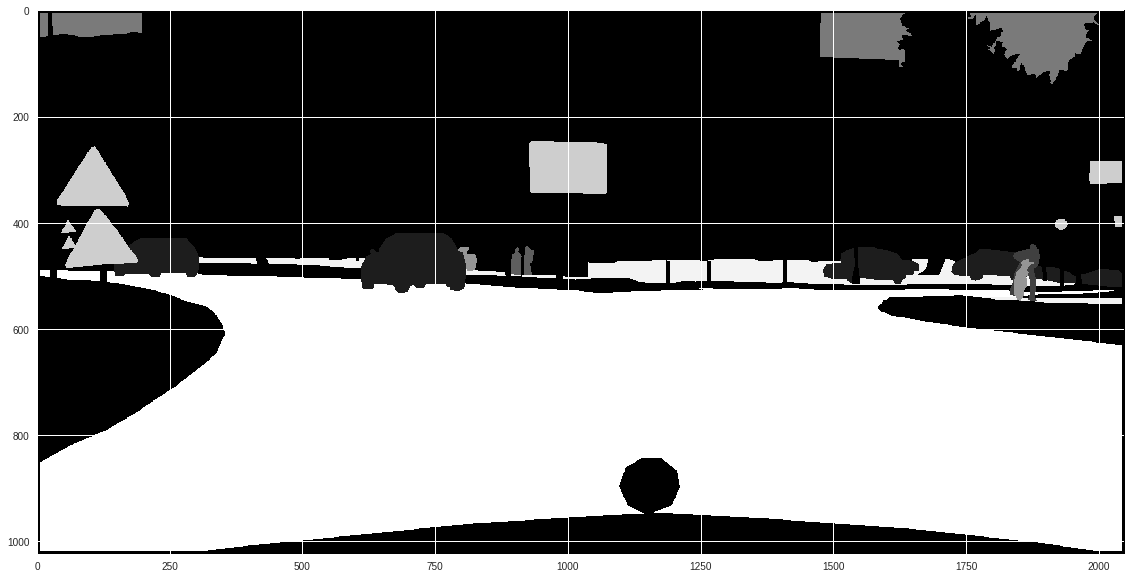

(array([ 830558,   29498,       0,   34908,       0,    2295,   38459,
           1577,    2264,   42843, 1114750,       0,       0,       0,
              0,       0,       0,       0,       0,       0,       0,
              0,       0,       0,       0,       0,       0,       0,
              0,       0,       0,       0,       0,       0,       0,
              0,       0,       0,       0,       0,       0,       0,
              0,       0,       0,       0,       0,       0,       0,
              0,       0,       0,       0,       0,       0,       0,
              0,       0,       0,       0,       0,       0,       0,
              0,       0,       0,       0,       0,       0,       0,
              0,       0,       0,       0,       0,       0,       0,
              0,       0,       0,       0,       0,       0,       0,
              0,       0,       0,       0,       0,       0,       0,
              0,       0,       0,       0,       0,       0,       0,
      

In [0]:
#checking 
# import random
import matplotlib.image as mpimg
file_name = 'aachen_000000_000019_gtFine_labelTrainIds.png'
tmg_=u'/content/gtFine/train/aachen/'+ file_name
tmg = mpimg.imread(tmg_)

figure = plt.figure(figsize=(20, 10))

#plt.axis('off')
plt.imshow(tmg)

plt.show()
np.histogram(tmg*255, bins=range(256))

## Move gtFine files to data folder

In [0]:
#https://github.com/lamhiutung/Cityscapes/blob/master/scripts/process_dataset.py
import os
import re
import shutil


SOURCE_DIR = './gtFine'
subpaths = os.listdir(SOURCE_DIR)
OUT_DIR = './cityscapes/data'
!mkdir -p ./cityscapes/data
#pattern = r'.+.json$' #only care .json files
pattern = r'(.+)_gtFine_color+\.json$'

# for subpath in ['train', 'test', 'val']
for subpath in subpaths:
    # join the './gtFine' for walk dir
    tmp_subpath = os.path.join(SOURCE_DIR, subpath)
    
    # create the output dir
    temp_dst = os.path.join(OUT_DIR, subpath+'annot')
    
    #if the foler does not exist, create it
    if not os.path.exists(temp_dst):
        os.mkdir(temp_dst)


    for dirpath, dirnames, filenames in os.walk(tmp_subpath):
        for filename in filenames:
            if r'gtFine_labelTrainIds.png' in filename:#re.match(pattern, filename):
                srcimage = os.path.join(dirpath, filename)
                shutil.copy(srcimage, temp_dst)
              

### Rename gtFine files

In [0]:
#https://github.com/lamhiutung/Cityscapes/blob/master/scripts/process_filename.py

#!/usr/bin/env python
# coding=utf-8

#rename files
import os
import re

source_dir = './cityscapes/data'

# for subpath in ['trainannot', 'testannot', 'valannot']
for subpath in os.listdir(source_dir):
    path = os.path.join(source_dir,subpath)

    files = os.listdir(path)
    counter = 0
    for file in files:
        try:
            newname = re.findall(r'(.+)_gt.+\.png$', file)[0]
            newname += '.png'
        except Exception as e:
            print(e)
            continue
        src_file = os.path.join(path, file)
        dst_file = os.path.join(path, newname)
        os.rename(src_file, dst_file)
     #   print("Successfully rename {} -> {}".format(src_file, dst_file))
        counter += 1

    print(counter)

## The following block of codes is to download leftImg8bit_trainvaltest.zip (11GB) in cityscapes

In [0]:
'''#WARNING: sensitive information
#https://towardsdatascience.com/download-city-scapes-dataset-with-script-3061f87b20d7
The following block of codes is to download the gtFine_trainvaltest.zip
Then unzip it
'''
!wget --load-cookies cookies.txt --content-disposition https://www.cityscapes-dataset.com/file-handling/?packageID=3
  
import os
import zipfile
file_name ='leftImg8bit_trainvaltest.zip'  

with zipfile.ZipFile(os.path.join(os.getcwd(), file_name), 'r') as zip_ref:
    zip_ref.extractall()

#then remove the file
os.remove(file_name)


--2019-03-12 13:15:50--  https://www.cityscapes-dataset.com/file-handling/?packageID=3
Resolving www.cityscapes-dataset.com (www.cityscapes-dataset.com)... 139.19.217.8
Connecting to www.cityscapes-dataset.com (www.cityscapes-dataset.com)|139.19.217.8|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11592327197 (11G) [application/octet-stream]
Saving to: ‘leftImg8bit_trainvaltest.zip’

leftImg8bit_trainva 100%[===================>]  10.80G  25.7MB/s    in 7m 14s  

2019-03-12 13:23:04 (25.5 MB/s) - ‘leftImg8bit_trainvaltest.zip’ saved [11592327197/11592327197]



In [0]:
#https://github.com/lamhiutung/Cityscapes/blob/master/scripts/process_dataset.py
import os
import re
import shutil


SOURCE_DIR = './leftImg8bit'
subpaths = os.listdir(SOURCE_DIR)
OUT_DIR = './cityscapes/data'
!mkdir -p ./cityscapes/data

# for subpath in ['train', 'test', 'val']
for subpath in subpaths:
    # join the './gtFine' for walk dir
    tmp_subpath = os.path.join(SOURCE_DIR, subpath)
    
    # create the output dir
    temp_dst = os.path.join(OUT_DIR, subpath)

    if not os.path.exists(temp_dst):
        os.mkdir(temp_dst)

    count = 0
    for dirpath, dirnames, filenames in os.walk(tmp_subpath):
        for filename in filenames:
            if r'.png' in filename:
                srcimage = os.path.join(dirpath, filename)##old name
                newname =   re.findall(r'(.+)_leftImg.+\.png$', filename)[0]
                newname += '.png'
                os.rename(srcimage, os.path.join(temp_dst, newname))
       #         print("Successfully move {} -> {}".format(srcimage, temp_dst))
                count +=1
    
    print(count)
     

1525
500
2975


#### Delete folder

In [0]:
path = './leftImg8bit'
shutil.rmtree(path)

## Plot images

In [0]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
nrows = 3
ncols = 2
ls_file = os.listdir('./cityscapes/data/train')
fig = plt.gcf()
fig.set_size_inches(ncols * 6, nrows * 5)

for i in range(nrows):
    file_name = random.choice(ls_file)
    tmg_=u'/content/cityscapes/data/train/'+ file_name
    smg_=u'/content/cityscapes/data/trainannot/' + file_name
    tmg = mpimg.imread(tmg_)
    smg = mpimg.imread(smg_)

    plt.subplot(nrows, ncols, 2*i+1)
    #plt.title('Input Image')
    #plt.axis('off')
    plt.imshow(smg)
    
    plt.subplot(nrows, ncols, 2*i+2)
    #plt.title('Output Image')
    plt.axis('off')
    plt.imshow(tmg)
plt.show()

# Training

## Preprocessing package


In [0]:
import tensorflow as tf

def preprocess(image, annotation=None, height=360, width=480):
    '''
    Performs preprocessing for one set of image and annotation for feeding into network.
    NO scaling of any sort will be done as per original paper.
    INPUTS:
    - image (Tensor): the image input 3D Tensor of shape [height, width, 3]
    - annotation (Tensor): the annotation input 3D Tensor of shape [height, width, 1]
    - height (int): the output height to reshape the image and annotation into
    - width (int): the output width to reshape the image and annotation into
    OUTPUTS:
    - preprocessed_image(Tensor): the reshaped image tensor
    - preprocessed_annotation(Tensor): the reshaped annotation tensor
    '''

    #Convert the image and annotation dtypes to tf.float32 if needed
    if image.dtype != tf.float32:
        image = tf.image.convert_image_dtype(image, dtype=tf.float32)
        # image = tf.cast(image, tf.float32)

    image = tf.image.resize_image_with_crop_or_pad(image, height, width)
    image.set_shape(shape=(height, width, 3))

    if not annotation == None:
        annotation = tf.image.resize_image_with_crop_or_pad(annotation, height, width)
        annotation.set_shape(shape=(height, width, 1))

        return image, annotation

    return image

## Enet package


In [0]:
import tensorflow as tf
from tensorflow.contrib.layers.python.layers import initializers
slim = tf.contrib.slim

'''
============================================================================
ENet: A Deep Neural Network Architecture for Real-Time Semantic Segmentation
============================================================================
Based on the paper: https://arxiv.org/pdf/1606.02147.pdf
'''
@slim.add_arg_scope
def prelu(x, scope, decoder=False):
    '''
    Performs the parametric relu operation. This implementation is based on:
    https://stackoverflow.com/questions/39975676/how-to-implement-prelu-activation-in-tensorflow
    For the decoder portion, prelu becomes just a normal prelu
    INPUTS:
    - x(Tensor): a 4D Tensor that undergoes prelu
    - scope(str): the string to name your prelu operation's alpha variable.
    - decoder(bool): if True, prelu becomes a normal relu.
    OUTPUTS:
    - pos + neg / x (Tensor): gives prelu output only during training; otherwise, just return x.
    '''
    #If decoder, then perform relu and just return the output
    if decoder:
        return tf.nn.relu(x, name=scope)

    alpha= tf.get_variable(scope + 'alpha', x.get_shape()[-1],
                       initializer=tf.constant_initializer(0.0),
                        dtype=tf.float32)
    pos = tf.nn.relu(x)
    neg = alpha * (x - abs(x)) * 0.5
    return pos + neg

def spatial_dropout(x, p, seed, scope, is_training=True):
    '''
    Performs a 2D spatial dropout that drops layers instead of individual elements in an input feature map.
    Note that p stands for the probability of dropping, but tf.nn.relu uses probability of keeping.
    ------------------
    Technical Details
    ------------------
    The noise shape must be of shape [batch_size, 1, 1, num_channels], with the height and width set to 1, because
    it will represent either a 1 or 0 for each layer, and these 1 or 0 integers will be broadcasted to the entire
    dimensions of each layer they interact with such that they can decide whether each layer should be entirely
    'dropped'/set to zero or have its activations entirely kept.
    --------------------------
    INPUTS:
    - x(Tensor): a 4D Tensor of the input feature map.
    - p(float): a float representing the probability of dropping a layer
    - seed(int): an integer for random seeding the random_uniform distribution that runs under tf.nn.relu
    - scope(str): the string name for naming the spatial_dropout
    - is_training(bool): to turn on dropout only when training. Optional.
    OUTPUTS:
    - output(Tensor): a 4D Tensor that is in exactly the same size as the input x,
                      with certain layers having their elements all set to 0 (i.e. dropped).
    '''
    if is_training:
        keep_prob = 1.0 - p
        input_shape = x.get_shape().as_list()
        noise_shape = tf.constant(value=[input_shape[0], 1, 1, input_shape[3]])
        output = tf.nn.dropout(x, keep_prob, noise_shape, seed=seed, name=scope)

        return output

    return x

def unpool(updates, mask, k_size=[1, 2, 2, 1], output_shape=None, scope=''):
    '''
    Unpooling function based on the implementation by Panaetius at https://github.com/tensorflow/tensorflow/issues/2169
    INPUTS:
    - inputs(Tensor): a 4D tensor of shape [batch_size, height, width, num_channels] that represents the input block to be upsampled
    - mask(Tensor): a 4D tensor that represents the argmax values/pooling indices of the previously max-pooled layer
    - k_size(list): a list of values representing the dimensions of the unpooling filter.
    - output_shape(list): a list of values to indicate what the final output shape should be after unpooling
    - scope(str): the string name to name your scope
    OUTPUTS:
    - ret(Tensor): the returned 4D tensor that has the shape of output_shape.
    '''
    with tf.variable_scope(scope):
        mask = tf.cast(mask, tf.int32)
        input_shape = tf.shape(updates, out_type=tf.int32)
        #  calculation new shape
        if output_shape is None:
            output_shape = (input_shape[0], input_shape[1] * ksize[1], input_shape[2] * ksize[2], input_shape[3])

        # calculation indices for batch, height, width and feature maps
        one_like_mask = tf.ones_like(mask, dtype=tf.int32)
        batch_shape = tf.concat([[input_shape[0]], [1], [1], [1]], 0)
        batch_range = tf.reshape(tf.range(output_shape[0], dtype=tf.int32), shape=batch_shape)
        b = one_like_mask * batch_range
        y = mask // (output_shape[2] * output_shape[3])
        x = (mask // output_shape[3]) % output_shape[2] #mask % (output_shape[2] * output_shape[3]) // output_shape[3]
        feature_range = tf.range(output_shape[3], dtype=tf.int32)
        f = one_like_mask * feature_range

        # transpose indices & reshape update values to one dimension
        updates_size = tf.size(updates)
        indices = tf.transpose(tf.reshape(tf.stack([b, y, x, f]), [4, updates_size]))
        values = tf.reshape(updates, [updates_size])
        ret = tf.scatter_nd(indices, values, output_shape)
        return ret

@slim.add_arg_scope
def initial_block(inputs, is_training=True, scope='initial_block'):
    '''
    The initial block for Enet has 2 branches: The convolution branch and Maxpool branch.
    The conv branch has 13 layers, while the maxpool branch gives 3 layers corresponding to the RGB channels.
    Both output layers are then concatenated to give an output of 16 layers.
    NOTE: Does not need to store pooling indices since it won't be used later for the final upsampling.
    INPUTS:
    - inputs(Tensor): A 4D tensor of shape [batch_size, height, width, channels]
    OUTPUTS:
    - net_concatenated(Tensor): a 4D Tensor that contains the 
    '''
    #Convolutional branch
    net_conv = slim.conv2d(inputs, 13, [3,3], stride=2, activation_fn=None, scope=scope+'_conv')
    net_conv = slim.batch_norm(net_conv, is_training=is_training, fused=True, scope=scope+'_batchnorm')
    net_conv = prelu(net_conv, scope=scope+'_prelu')

    #Max pool branch
    net_pool = slim.max_pool2d(inputs, [2,2], stride=2, scope=scope+'_max_pool')

    #Concatenated output - does it matter max pool comes first or conv comes first? probably not.
    net_concatenated = tf.concat([net_conv, net_pool], axis=3, name=scope+'_concat')
    return net_concatenated

@slim.add_arg_scope
def bottleneck(inputs,
               output_depth,
               filter_size,
               regularizer_prob,
               projection_ratio=4,
               seed=0,
               is_training=True,
               downsampling=False,
               upsampling=False,
               pooling_indices=None,
               output_shape=None,
               dilated=False,
               dilation_rate=None,
               asymmetric=False,
               decoder=False,
               scope='bottleneck'):
    '''
    The bottleneck module has three different kinds of variants:
    1. A regular convolution which you can decide whether or not to downsample.
    2. A dilated convolution, which requires you to have a dilation factor.
    3. An asymmetric convolution that has a decomposed filter size of 5x1 and 1x5 separately.
    INPUTS:
    - inputs(Tensor): a 4D Tensor of the previous convolutional block of shape [batch_size, height, width, num_channels].
    - output_depth(int): an integer indicating the output depth of the output convolutional block.
    - filter_size(int): an integer that gives the height and width of the filter size to use for a regular/dilated convolution.
    - regularizer_prob(float): the float p that represents the prob of dropping a layer for spatial dropout regularization.
    - projection_ratio(int): the amount of depth to reduce for initial 1x1 projection. Depth is divided by projection ratio. Default is 4.
    - seed(int): an integer for the random seed used in the random normal distribution within dropout.
    - is_training(bool): a boolean value to indicate whether or not is training. Decides batch_norm and prelu activity.
    - downsampling(bool): if True, a max-pool2D layer is added to downsample the spatial sizes.
    - upsampling(bool): if True, the upsampling bottleneck is activated but requires pooling indices to upsample.
    - pooling_indices(Tensor): the argmax values that are obtained after performing tf.nn.max_pool_with_argmax.
    - output_shape(list): A list of integers indicating the output shape of the unpooling layer.
    - dilated(bool): if True, then dilated convolution is done, but requires a dilation rate to be given.
    - dilation_rate(int): the dilation factor for performing atrous convolution/dilated convolution.
    - asymmetric(bool): if True, then asymmetric convolution is done, and the only filter size used here is 5.
    - decoder(bool): if True, then all the prelus become relus according to ENet author.
    - scope(str): a string name that names your bottleneck.
    OUTPUTS:
    - net(Tensor): The convolution block output after a bottleneck
    - pooling_indices(Tensor): If downsample, then this tensor is produced for use in upooling later.
    - inputs_shape(list): The shape of the input to the downsampling conv block. For use in unpooling later.
    '''
    #Calculate the depth reduction based on the projection ratio used in 1x1 convolution.
    reduced_depth = int(inputs.get_shape().as_list()[3] / projection_ratio)

    with slim.arg_scope([prelu], decoder=decoder):

        #=============DOWNSAMPLING BOTTLENECK====================
        if downsampling:
            #=============MAIN BRANCH=============
            #Just perform a max pooling
            net_main, pooling_indices = tf.nn.max_pool_with_argmax(inputs,
                                                                   ksize=[1,2,2,1],
                                                                   strides=[1,2,2,1],
                                                                   padding='SAME',
                                                                   name=scope+'_main_max_pool')

            #First get the difference in depth to pad, then pad with zeros only on the last dimension.
            inputs_shape = inputs.get_shape().as_list()
            depth_to_pad = abs(inputs_shape[3] - output_depth)
            paddings = tf.convert_to_tensor([[0,0], [0,0], [0,0], [0, depth_to_pad]])
            net_main = tf.pad(net_main, paddings=paddings, name=scope+'_main_padding')

            #=============SUB BRANCH==============
            #First projection that has a 2x2 kernel and stride 2
            net = slim.conv2d(inputs, reduced_depth, [2,2], stride=2, scope=scope+'_conv1')
            net = slim.batch_norm(net, is_training=is_training, scope=scope+'_batch_norm1')
            net = prelu(net, scope=scope+'_prelu1')

            #Second conv block
            net = slim.conv2d(net, reduced_depth, [filter_size, filter_size], scope=scope+'_conv2')
            net = slim.batch_norm(net, is_training=is_training, scope=scope+'_batch_norm2')
            net = prelu(net, scope=scope+'_prelu2')

            #Final projection with 1x1 kernel
            net = slim.conv2d(net, output_depth, [1,1], scope=scope+'_conv3')
            net = slim.batch_norm(net, is_training=is_training, scope=scope+'_batch_norm3')
            net = prelu(net, scope=scope+'_prelu3')

            #Regularizer
            net = spatial_dropout(net, p=regularizer_prob, seed=seed, scope=scope+'_spatial_dropout')

            #Finally, combine the two branches together via an element-wise addition
            net = tf.add(net, net_main, name=scope+'_add')
            net = prelu(net, scope=scope+'_last_prelu')

            #also return inputs shape for convenience later
            return net, pooling_indices, inputs_shape

        #============DILATION CONVOLUTION BOTTLENECK====================
        #Everything is the same as a regular bottleneck except for the dilation rate argument
        elif dilated:
            #Check if dilation rate is given
            if not dilation_rate:
                raise ValueError('Dilation rate is not given.')

            #Save the main branch for addition later
            net_main = inputs

            #First projection with 1x1 kernel (dimensionality reduction)
            net = slim.conv2d(inputs, reduced_depth, [1,1], scope=scope+'_conv1')
            net = slim.batch_norm(net, is_training=is_training, scope=scope+'_batch_norm1')
            net = prelu(net, scope=scope+'_prelu1')

            #Second conv block --- apply dilated convolution here
            net = slim.conv2d(net, reduced_depth, [filter_size, filter_size], rate=dilation_rate, scope=scope+'_dilated_conv2')
            net = slim.batch_norm(net, is_training=is_training, scope=scope+'_batch_norm2')
            net = prelu(net, scope=scope+'_prelu2')

            #Final projection with 1x1 kernel (Expansion)
            net = slim.conv2d(net, output_depth, [1,1], scope=scope+'_conv3')
            net = slim.batch_norm(net, is_training=is_training, scope=scope+'_batch_norm3')
            net = prelu(net, scope=scope+'_prelu3')

            #Regularizer
            net = spatial_dropout(net, p=regularizer_prob, seed=seed, scope=scope+'_spatial_dropout')
            net = prelu(net, scope=scope+'_prelu4')

            #Add the main branch
            net = tf.add(net_main, net, name=scope+'_add_dilated')
            net = prelu(net, scope=scope+'_last_prelu')

            return net

        #===========ASYMMETRIC CONVOLUTION BOTTLENECK==============
        #Everything is the same as a regular bottleneck except for a [5,5] kernel decomposed into two [5,1] then [1,5]
        elif asymmetric:
            #Save the main branch for addition later
            net_main = inputs

            #First projection with 1x1 kernel (dimensionality reduction)
            net = slim.conv2d(inputs, reduced_depth, [1,1], scope=scope+'_conv1')
            net = slim.batch_norm(net, is_training=is_training, scope=scope+'_batch_norm1')
            net = prelu(net, scope=scope+'_prelu1')

            #Second conv block --- apply asymmetric conv here
            net = slim.conv2d(net, reduced_depth, [filter_size, 1], scope=scope+'_asymmetric_conv2a')
            net = slim.conv2d(net, reduced_depth, [1, filter_size], scope=scope+'_asymmetric_conv2b')
            net = slim.batch_norm(net, is_training=is_training, scope=scope+'_batch_norm2')
            net = prelu(net, scope=scope+'_prelu2')

            #Final projection with 1x1 kernel
            net = slim.conv2d(net, output_depth, [1,1], scope=scope+'_conv3')
            net = slim.batch_norm(net, is_training=is_training, scope=scope+'_batch_norm3')
            net = prelu(net, scope=scope+'_prelu3')

            #Regularizer
            net = spatial_dropout(net, p=regularizer_prob, seed=seed, scope=scope+'_spatial_dropout')
            net = prelu(net, scope=scope+'_prelu4')

            #Add the main branch
            net = tf.add(net_main, net, name=scope+'_add_asymmetric')
            net = prelu(net, scope=scope+'_last_prelu')

            return net

        #============UPSAMPLING BOTTLENECK================
        #Everything is the same as a regular one, except convolution becomes transposed.
        elif upsampling:
            #Check if pooling indices is given
            if pooling_indices == None:
                raise ValueError('Pooling indices are not given.')

            #Check output_shape given or not
            if output_shape == None:
                raise ValueError('Output depth is not given')

            #=======MAIN BRANCH=======
            #Main branch to upsample. output shape must match with the shape of the layer that was pooled initially, in order
            #for the pooling indices to work correctly. However, the initial pooled layer was padded, so need to reduce dimension
            #before unpooling. In the paper, padding is replaced with convolution for this purpose of reducing the depth!
            net_unpool = slim.conv2d(inputs, output_depth, [1,1], scope=scope+'_main_conv1')
            net_unpool = slim.batch_norm(net_unpool, is_training=is_training, scope=scope+'batch_norm1')
            net_unpool = unpool(net_unpool, pooling_indices, output_shape=output_shape, scope='unpool')

            #======SUB BRANCH=======
            #First 1x1 projection to reduce depth
            net = slim.conv2d(inputs, reduced_depth, [1,1], scope=scope+'_conv1')
            net = slim.batch_norm(net, is_training=is_training, scope=scope+'_batch_norm2')
            net = prelu(net, scope=scope+'_prelu1')

            #Second conv block -----------------------------> NOTE: using tf.nn.conv2d_transpose for variable input shape.
            net_unpool_shape = net_unpool.get_shape().as_list()
            output_shape = [net_unpool_shape[0], net_unpool_shape[1], net_unpool_shape[2], reduced_depth]
            output_shape = tf.convert_to_tensor(output_shape)
            filter_size = [filter_size, filter_size, reduced_depth, reduced_depth]
            filters = tf.get_variable(shape=filter_size, initializer=initializers.xavier_initializer(), dtype=tf.float32, name=scope+'_transposed_conv2_filters')

            # net = slim.conv2d_transpose(net, reduced_depth, [filter_size, filter_size], stride=2, scope=scope+'_transposed_conv2')
            net = tf.nn.conv2d_transpose(net, filter=filters, strides=[1,2,2,1], output_shape=output_shape, name=scope+'_transposed_conv2')
            net = slim.batch_norm(net, is_training=is_training, scope=scope+'_batch_norm3')
            net = prelu(net, scope=scope+'_prelu2')

            #Final projection with 1x1 kernel
            net = slim.conv2d(net, output_depth, [1,1], scope=scope+'_conv3')
            net = slim.batch_norm(net, is_training=is_training, scope=scope+'_batch_norm4')
            net = prelu(net, scope=scope+'_prelu3')

            #Regularizer
            net = spatial_dropout(net, p=regularizer_prob, seed=seed, scope=scope+'_spatial_dropout')
            net = prelu(net, scope=scope+'_prelu4')

            #Finally, add the unpooling layer and the sub branch together
            net = tf.add(net, net_unpool, name=scope+'_add_upsample')
            net = prelu(net, scope=scope+'_last_prelu')

            return net

        #OTHERWISE, just perform a regular bottleneck!
        #==============REGULAR BOTTLENECK==================
        #Save the main branch for addition later
        net_main = inputs

        #First projection with 1x1 kernel
        net = slim.conv2d(inputs, reduced_depth, [1,1], scope=scope+'_conv1')
        net = slim.batch_norm(net, is_training=is_training, scope=scope+'_batch_norm1')
        net = prelu(net, scope=scope+'_prelu1')

        #Second conv block
        net = slim.conv2d(net, reduced_depth, [filter_size, filter_size], scope=scope+'_conv2')
        net = slim.batch_norm(net, is_training=is_training, scope=scope+'_batch_norm2')
        net = prelu(net, scope=scope+'_prelu2')

        #Final projection with 1x1 kernel
        net = slim.conv2d(net, output_depth, [1,1], scope=scope+'_conv3')
        net = slim.batch_norm(net, is_training=is_training, scope=scope+'_batch_norm3')
        net = prelu(net, scope=scope+'_prelu3')

        #Regularizer
        net = spatial_dropout(net, p=regularizer_prob, seed=seed, scope=scope+'_spatial_dropout')
        net = prelu(net, scope=scope+'_prelu4')

        #Add the main branch
        net = tf.add(net_main, net, name=scope+'_add_regular')
        net = prelu(net, scope=scope+'_last_prelu')

        return net

#Now actually start building the network
def ENet(inputs,
         num_classes,
         batch_size,
         num_initial_blocks=1,
         stage_two_repeat=2,
         skip_connections=True,
         reuse=None,
         is_training=True,
         scope='ENet'):
    '''
    The ENet model for real-time semantic segmentation!
    INPUTS:
    - inputs(Tensor): a 4D Tensor of shape [batch_size, image_height, image_width, num_channels] that represents one batch of preprocessed images.
    - num_classes(int): an integer for the number of classes to predict. This will determine the final output channels as the answer.
    - batch_size(int): the batch size to explictly set the shape of the inputs in order for operations to work properly.
    - num_initial_blocks(int): the number of times to repeat the initial block.
    - stage_two_repeat(int): the number of times to repeat stage two in order to make the network deeper.
    - skip_connections(bool): if True, add the corresponding encoder feature maps to the decoder. They are of exact same shapes.
    - reuse(bool): Whether or not to reuse the variables for evaluation.
    - is_training(bool): if True, switch on batch_norm and prelu only during training, otherwise they are turned off.
    - scope(str): a string that represents the scope name for the variables.
    OUTPUTS:
    - net(Tensor): a 4D Tensor output of shape [batch_size, image_height, image_width, num_classes], where each pixel has a one-hot encoded vector
                      determining the label of the pixel.
    '''
    #Set the shape of the inputs first to get the batch_size information
    inputs_shape = inputs.get_shape().as_list()
    inputs.set_shape(shape=(batch_size, inputs_shape[1], inputs_shape[2], inputs_shape[3]))

    with tf.variable_scope(scope, reuse=reuse):
        #Set the primary arg scopes. Fused batch_norm is faster than normal batch norm.
        with slim.arg_scope([initial_block, bottleneck], is_training=is_training),\
             slim.arg_scope([slim.batch_norm], fused=True), \
             slim.arg_scope([slim.conv2d, slim.conv2d_transpose], activation_fn=None): 
            #=================INITIAL BLOCK=================
            net = initial_block(inputs, scope='initial_block_1')
            for i in range(2, max(num_initial_blocks, 1) + 1):
                net = initial_block(net, scope='initial_block_' + str(i))

            #Save for skip connection later
            if skip_connections:
                net_one = net

            #===================STAGE ONE=======================
            net, pooling_indices_1, inputs_shape_1 = bottleneck(net, output_depth=64, filter_size=3, regularizer_prob=0.01, downsampling=True, scope='bottleneck1_0')
            net = bottleneck(net, output_depth=64, filter_size=3, regularizer_prob=0.01, scope='bottleneck1_1')
            net = bottleneck(net, output_depth=64, filter_size=3, regularizer_prob=0.01, scope='bottleneck1_2')
            net = bottleneck(net, output_depth=64, filter_size=3, regularizer_prob=0.01, scope='bottleneck1_3')
            net = bottleneck(net, output_depth=64, filter_size=3, regularizer_prob=0.01, scope='bottleneck1_4')

            #Save for skip connection later
            if skip_connections:
                net_two = net

            #regularization prob is 0.1 from bottleneck 2.0 onwards
            with slim.arg_scope([bottleneck], regularizer_prob=0.1):
                net, pooling_indices_2, inputs_shape_2 = bottleneck(net, output_depth=128, filter_size=3, downsampling=True, scope='bottleneck2_0')
                
                #Repeat the stage two at least twice to get stage 2 and 3:
                for i in range(2, max(stage_two_repeat, 2) + 2):
                    net = bottleneck(net, output_depth=128, filter_size=3, scope='bottleneck'+str(i)+'_1')
                    net = bottleneck(net, output_depth=128, filter_size=3, dilated=True, dilation_rate=2, scope='bottleneck'+str(i)+'_2')
                    net = bottleneck(net, output_depth=128, filter_size=5, asymmetric=True, scope='bottleneck'+str(i)+'_3')
                    net = bottleneck(net, output_depth=128, filter_size=3, dilated=True, dilation_rate=4, scope='bottleneck'+str(i)+'_4')
                    net = bottleneck(net, output_depth=128, filter_size=3, scope='bottleneck'+str(i)+'_5')
                    net = bottleneck(net, output_depth=128, filter_size=3, dilated=True, dilation_rate=8, scope='bottleneck'+str(i)+'_6')
                    net = bottleneck(net, output_depth=128, filter_size=5, asymmetric=True, scope='bottleneck'+str(i)+'_7')
                    net = bottleneck(net, output_depth=128, filter_size=3, dilated=True, dilation_rate=16, scope='bottleneck'+str(i)+'_8')

            with slim.arg_scope([bottleneck], regularizer_prob=0.1, decoder=True):
                #===================STAGE FOUR========================
                bottleneck_scope_name = "bottleneck" + str(i + 1)

                #The decoder section, so start to upsample.
                net = bottleneck(net, output_depth=64, filter_size=3, upsampling=True,
                                 pooling_indices=pooling_indices_2, output_shape=inputs_shape_2, scope=bottleneck_scope_name+'_0')

                #Perform skip connections here
                if skip_connections:
                    net = tf.add(net, net_two, name=bottleneck_scope_name+'_skip_connection')

                net = bottleneck(net, output_depth=64, filter_size=3, scope=bottleneck_scope_name+'_1')
                net = bottleneck(net, output_depth=64, filter_size=3, scope=bottleneck_scope_name+'_2')

                #===================STAGE FIVE========================
                bottleneck_scope_name = "bottleneck" + str(i + 2)

                net = bottleneck(net, output_depth=16, filter_size=3, upsampling=True,
                                 pooling_indices=pooling_indices_1, output_shape=inputs_shape_1, scope=bottleneck_scope_name+'_0')

                #perform skip connections here
                if skip_connections:
                    net = tf.add(net, net_one, name=bottleneck_scope_name+'_skip_connection')

                net = bottleneck(net, output_depth=16, filter_size=3, scope=bottleneck_scope_name+'_1')

            #=============FINAL CONVOLUTION=============
            logits = slim.conv2d_transpose(net, num_classes, [2,2], stride=2, scope='fullconv')
            probabilities = tf.nn.softmax(logits, name='logits_to_softmax')

        return logits, probabilities


def ENet_arg_scope(weight_decay=2e-4,
                   batch_norm_decay=0.1,
                   batch_norm_epsilon=0.001):
  '''
  The arg scope for enet model. The weight decay is 2e-4 as seen in the paper.
  Batch_norm decay is 0.1 (momentum 0.1) according to official implementation.
  INPUTS:
  - weight_decay(float): the weight decay for weights variables in conv2d and separable conv2d
  - batch_norm_decay(float): decay for the moving average of batch_norm momentums.
  - batch_norm_epsilon(float): small float added to variance to avoid dividing by zero.
  OUTPUTS:
  - scope(arg_scope): a tf-slim arg_scope with the parameters needed for xception.
  '''
  # Set weight_decay for weights in conv2d and separable_conv2d layers.
  with slim.arg_scope([slim.conv2d],
                      weights_regularizer=slim.l2_regularizer(weight_decay),
                      biases_regularizer=slim.l2_regularizer(weight_decay)):

    # Set parameters for batch_norm.
    with slim.arg_scope([slim.batch_norm],
                        decay=batch_norm_decay,
                        epsilon=batch_norm_epsilon) as scope:
      return scope

## Get_class_weight package

In [0]:
import numpy as np
import os
from imageio import imread
import ast
import math



def ENet_weighing(image_files, num_classes):
    '''
    The custom class weighing function as seen in the ENet paper.
    INPUTS:
    - image_files(list): a list of image_filenames which element can be read immediately
    OUTPUTS:
    - class_weights(list): a list of class weights where each index represents each class label and the element is the class weight for that label.
    '''
    image_dir = image_files
    image_files = [os.path.join(image_dir, file) for file in os.listdir(image_dir) if file.endswith('.png')]

    #initialize dictionary with all 0
    label_to_frequency = {}
    for i in range(num_classes):
        label_to_frequency[i] = 0

    for n in range(len(image_files)):
        image = imread(image_files[n])

        #For each label in each image, sum up the frequency of the label and add it to label_to_frequency dict
        for i in range(num_classes):
            class_mask = np.equal(image, i)
            class_mask = class_mask.astype(np.float32)
            class_frequency = np.sum(class_mask)

            label_to_frequency[i] += class_frequency

    #perform the weighing function label-wise and append the label's class weights to class_weights
    class_weights = []
    total_frequency = sum(label_to_frequency.values())
    for label, frequency in label_to_frequency.items():
        class_weight = 1 / np.log(1.02 + (frequency / total_frequency))
        class_weights.append(class_weight)

    #Set the last class_weight to 0.0
    class_weights[0] = class_weights[0] * 1.0 #Percentage of the weight to be used

    for i in range(len(class_weights)):
        if math.isnan(class_weights[i]):
            class_weights[i] = 0.0

    return class_weights

def median_frequency_balancing(image_files, num_classes):
    '''
    Perform median frequency balancing on the image files, given by the formula:
    f = Median_freq_c / total_freq_c
    where median_freq_c is the median frequency of the class for all pixels of C that appeared in images
    and total_freq_c is the total number of pixels of c in the total pixels of the images where c appeared.
    INPUTS:
    - image_files(list): a list of image_filenames which element can be read immediately
    - num_classes(int): the number of classes of pixels in all images
    OUTPUTS:
    - class_weights(list): a list of class weights where each index represents each class label and the element is the class weight for that label.
    '''
    image_dir = image_files
    image_files = [os.path.join(image_dir, file) for file in os.listdir(image_dir) if file.endswith('.png')]

    #Initialize all the labels key with a list value
    label_to_frequency_dict = {}
    for i in range(num_classes):
        label_to_frequency_dict[i] = []

    for n in range(len(image_files)):
        image = imread(image_files[n])

        #For each image sum up the frequency of each label in that image and append to the dictionary if frequency is positive.
        for i in range(num_classes):
            class_mask = np.equal(image, i)
            class_mask = class_mask.astype(np.float32)
            class_frequency = np.sum(class_mask)

            if class_frequency != 0.0:
                label_to_frequency_dict[i].append(class_frequency)

    class_weights = []

    #Get the total pixels to calculate total_frequency later
    total_pixels = 0
    for frequencies in label_to_frequency_dict.values():
        total_pixels += sum(frequencies)

    for i, j in label_to_frequency_dict.items():
        j = sorted(j) #To obtain the median, we got to sort the frequencies

        median_frequency = np.median(j) / sum(j)
        total_frequency = sum(j) / total_pixels
        median_frequency_balanced = median_frequency / total_frequency
        class_weights.append(median_frequency_balanced)

    #Set the last class_weight to 0.0 as it's the background class
    class_weights[0] = class_weights[0] * 1.0 #Percentage of the weight to be used

    for i in range(len(class_weights)):
        if math.isnan(class_weights[i]):
            class_weights[i] = 0.0

    return class_weights


'\nif __name__ == "__main__":\n    median_frequency_balancing(image_files, num_classes=13)\n    ENet_weighing(image_files, num_classes=13)\n'

## Train_enet

In [0]:
import tensorflow as tf
from tensorflow.contrib.framework.python.ops.variables import get_or_create_global_step
from tensorflow.python.platform import tf_logging as logging
#from enet import ENet, ENet_arg_scope
#from preprocessing import preprocess
#from get_class_weights import ENet_weighing, median_frequency_balancing
import os
import time
import numpy as np
import matplotlib.pyplot as plt
slim = tf.contrib.slim

####Delete all flags before declare#####

def del_all_flags(FLAGS):
    flags_dict = FLAGS._flags()    
    keys_list = [keys for keys in flags_dict]    
    for keys in keys_list:
        FLAGS.__delattr__(keys)

del_all_flags(tf.flags.FLAGS)

#==============INPUT ARGUMENTS==================
flags = tf.app.flags

#flags.DEFINE_integer('gpu', 1, 'GPU to use.')

#Directory arguments
flags.DEFINE_string('dataset_dir', './cityscapes/data', 'The dataset directory to find the train, validation and test images.')
flags.DEFINE_string('logdir', './log/original', 'The log directory to save your checkpoint and event files.')
flags.DEFINE_boolean('save_images', True, 'Whether or not to save your images.')
flags.DEFINE_boolean('combine_dataset', False, 'If True, combines the validation with the train dataset.')

#Training arguments
#num_classes = small (<13) is quicker to run?
flags.DEFINE_integer('num_classes', 11, 'The number of classes to predict.') 
flags.DEFINE_integer('batch_size', 10, 'The batch_size for training.')
flags.DEFINE_integer('eval_batch_size', 10, 'The batch size used for validation.')
flags.DEFINE_integer('image_height', 360, "The input height of the images.")
flags.DEFINE_integer('image_width', 480, "The input width of the images.")
flags.DEFINE_integer('num_epochs', 20, "The number of epochs to train your model.")
flags.DEFINE_integer('num_epochs_before_decay', 10, 'The number of epochs before decaying your learning rate.')
flags.DEFINE_float('weight_decay', 2e-4, "The weight decay for ENet convolution layers.")
flags.DEFINE_float('learning_rate_decay_factor', 1e-1, 'The learning rate decay factor.')
flags.DEFINE_float('initial_learning_rate', 5e-4, 'The initial learning rate for your training.')
flags.DEFINE_string('weighting', "ENET", 'Choice of Median Frequency Balancing or the custom ENet class weights.')

#Architectural changes
flags.DEFINE_integer('num_initial_blocks', 1, 'The number of initial blocks to use in ENet.')
flags.DEFINE_integer('stage_two_repeat', 2, 'The number of times to repeat stage two.')
flags.DEFINE_boolean('skip_connections', False, 'If True, perform skip connections from encoder to decoder.')
flags.DEFINE_string('f', '', 'kernel')
FLAGS = flags.FLAGS

#--os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
#--os.environ["CUDA_VISIBLE_DEVICES"] = str(FLAGS.gpu)

#==========NAME HANDLING FOR CONVENIENCE==============
num_classes = FLAGS.num_classes
batch_size = FLAGS.batch_size
image_height = FLAGS.image_height
image_width = FLAGS.image_width
eval_batch_size = FLAGS.eval_batch_size #Can be larger than train_batch as no need to backpropagate gradients.
combine_dataset = FLAGS.combine_dataset

#Training parameters
initial_learning_rate = FLAGS.initial_learning_rate
num_epochs_before_decay = FLAGS.num_epochs_before_decay
num_epochs =FLAGS.num_epochs
learning_rate_decay_factor = FLAGS.learning_rate_decay_factor
weight_decay = FLAGS.weight_decay
epsilon = 1e-8

#Architectural changes
num_initial_blocks = FLAGS.num_initial_blocks
stage_two_repeat = FLAGS.stage_two_repeat
skip_connections = FLAGS.skip_connections

#Use median frequency balancing or not
weighting = FLAGS.weighting

#Visualization and where to save images
save_images = FLAGS.save_images
photo_dir = os.path.join(FLAGS.logdir, "images")

#Directories
dataset_dir = FLAGS.dataset_dir
logdir = FLAGS.logdir

#===============PREPARATION FOR TRAINING==================
#Get the images into a list
image_files = sorted([os.path.join(dataset_dir, 'train', file) for file in os.listdir(dataset_dir + "/train") if file.endswith('.png')])
annotation_files = sorted([os.path.join(dataset_dir, "trainannot", file) for file in os.listdir(dataset_dir + "/trainannot") if file.endswith('.png')])

image_val_files = sorted([os.path.join(dataset_dir, 'val', file) for file in os.listdir(dataset_dir + "/val") if file.endswith('.png')])
annotation_val_files = sorted([os.path.join(dataset_dir, "valannot", file) for file in os.listdir(dataset_dir + "/valannot") if file.endswith('.png')])

''' 
#Turn this combination off. 
#See comment in https://github.com/kwotsin/TensorFlow-ENet/blob/master/README.md
#-->Important Notes-->6

if combine_dataset:
    image_files += image_val_files
    annotation_files += annotation_val_files
'''
#Know the number steps to take before decaying the learning rate and batches per epoch
num_batches_per_epoch = len(image_files) / batch_size
num_steps_per_epoch = num_batches_per_epoch
decay_steps = int(num_epochs_before_decay * num_steps_per_epoch)

#=================CLASS WEIGHTS===============================
#Median frequency balancing class_weights
if weighting == "MFB":
    class_weights = median_frequency_balancing(image_files = os.path.join(dataset_dir, 'trainannot'), num_classes = num_classes)
    print("========= Median Frequency Balancing Class Weights =========\n", class_weights)

#Inverse weighing probability class weights
elif weighting == "ENET":
    class_weights = ENet_weighing(image_files = os.path.join(dataset_dir, 'trainannot'), num_classes = num_classes)
    print("========= ENet Class Weights =========\n", class_weights)

#============= TRAINING =================
def weighted_cross_entropy(onehot_labels, logits, class_weights):
    '''
    A quick wrapper to compute weighted cross entropy. 
    ------------------
    Technical Details
    ------------------
    The class_weights list can be multiplied by onehot_labels directly because the last dimension
    of onehot_labels is 12 and class_weights (length 12) can broadcast across that dimension, which is what we want. 
    Then we collapse the last dimension for the class_weights to get a shape of (batch_size, height, width, 1)
    to get a mask with each pixel's value representing the class_weight.
    This mask can then be that can be broadcasted to the intermediate output of logits
    and onehot_labels when calculating the cross entropy loss.
    ------------------
    INPUTS:
    - onehot_labels(Tensor): the one-hot encoded labels of shape (batch_size, height, width, num_classes)
    - logits(Tensor): the logits output from the model that is of shape (batch_size, height, width, num_classes)
    - class_weights(list): A list where each index is the class label and the value of the index is the class weight.
    OUTPUTS:
    - loss(Tensor): a scalar Tensor that is the weighted cross entropy loss output.
    '''
    weights = onehot_labels * class_weights
    weights = tf.reduce_sum(weights, 3)
    loss = tf.losses.softmax_cross_entropy(onehot_labels=onehot_labels, logits=logits, weights=weights)

    return loss

def run():
    with tf.Graph().as_default() as graph:
        tf.logging.set_verbosity(tf.logging.INFO)

        #===================TRAINING BRANCH=======================
        #Load the files into one input queue
        images = tf.convert_to_tensor(image_files)
        annotations = tf.convert_to_tensor(annotation_files)
        input_queue = tf.train.slice_input_producer([images, annotations]) #Slice_input producer shuffles the data by default.

        #Decode the image and annotation raw content
        image = tf.read_file(input_queue[0])
        image = tf.image.decode_image(image, channels=3)
        annotation = tf.read_file(input_queue[1])
        annotation = tf.image.decode_image(annotation)

        #preprocess and batch up the image and annotation
        preprocessed_image, preprocessed_annotation = preprocess(image, annotation, image_height, image_width)
        images, annotations = tf.train.batch([preprocessed_image, preprocessed_annotation], batch_size=batch_size, allow_smaller_final_batch=True)

        #Create the model inference
        with slim.arg_scope(ENet_arg_scope(weight_decay=weight_decay)):
            logits, probabilities = ENet(inputs=images,
                                         num_classes=num_classes,
                                         batch_size=batch_size,
                                         is_training=True,
                                         reuse=None,
                                         num_initial_blocks=num_initial_blocks,
                                         stage_two_repeat=stage_two_repeat,
                                         skip_connections=skip_connections)

        #perform one-hot-encoding on the ground truth annotation to get same shape as the logits
        annotations = tf.reshape(annotations, shape=[batch_size, image_height, image_width])
        annotations_ohe = tf.one_hot(annotations, num_classes, axis=-1)

        #Actually compute the loss
        loss = weighted_cross_entropy(logits=logits, onehot_labels=annotations_ohe, class_weights=class_weights)
        total_loss = tf.losses.get_total_loss()

        #Create the global step for monitoring the learning_rate and training.
        global_step = get_or_create_global_step()

        #Define your exponentially decaying learning rate
        lr = tf.train.exponential_decay(
            learning_rate = initial_learning_rate,
            global_step = global_step,
            decay_steps = decay_steps,
            decay_rate = learning_rate_decay_factor,
            staircase = True)

        #Now we can define the optimizer that takes on the learning rate
        optimizer = tf.train.AdamOptimizer(learning_rate=lr, epsilon=epsilon)

        #Create the train_op.
        train_op = slim.learning.create_train_op(total_loss, optimizer)

        #State the metrics that you want to predict. We get a predictions that is not one_hot_encoded.
        predictions = tf.argmax(probabilities, -1)
        accuracy, accuracy_update = tf.contrib.metrics.streaming_accuracy(predictions, annotations)
        
        mean_IOU, mean_IOU_update = tf.contrib.metrics.streaming_mean_iou(predictions=predictions, labels=annotations, num_classes=num_classes)
        
        metrics_op = tf.group(accuracy_update, mean_IOU_update)

        #Now we need to create a training step function that runs both the train_op, metrics_op and updates the global_step concurrently.
        def train_step(sess, train_op, global_step, metrics_op):
            '''
            Simply runs a session for the three arguments provided and gives a logging on the time elapsed for each global step
            '''
            #Check the time for each sess run
            start_time = time.time()
            total_loss, global_step_count, accuracy_val, mean_IOU_val, _ = sess.run([train_op, global_step, accuracy, mean_IOU, metrics_op])
            time_elapsed = time.time() - start_time

            #Run the logging to show some results
            logging.info('global step %s: loss: %.4f (%.2f sec/step)    Current Streaming Accuracy: %.4f    Current Mean IOU: %.4f', global_step_count, total_loss, time_elapsed, accuracy_val, mean_IOU_val)
          #  print('global step %s: loss: %.4f (%.2f sec/step)    Current Streaming Accuracy: %.4f    Current Mean IOU: %.4f', global_step_count, total_loss, time_elapsed, accuracy_val, mean_IOU_val)
            return total_loss, accuracy_val, mean_IOU_val

        #================VALIDATION BRANCH========================
        #Load the files into one input queue
        images_val = tf.convert_to_tensor(image_val_files)
        annotations_val = tf.convert_to_tensor(annotation_val_files)
        input_queue_val = tf.train.slice_input_producer([images_val, annotations_val])

        #Decode the image and annotation raw content
        image_val = tf.read_file(input_queue_val[0])
        image_val = tf.image.decode_jpeg(image_val, channels=3)
        annotation_val = tf.read_file(input_queue_val[1])
        annotation_val = tf.image.decode_png(annotation_val)

        #preprocess and batch up the image and annotation
        preprocessed_image_val, preprocessed_annotation_val = preprocess(image_val, annotation_val, image_height, image_width)
        images_val, annotations_val = tf.train.batch([preprocessed_image_val, preprocessed_annotation_val], batch_size=eval_batch_size, allow_smaller_final_batch=True)

        with slim.arg_scope(ENet_arg_scope(weight_decay=weight_decay)):
            logits_val, probabilities_val = ENet(images_val,
                                                 num_classes,
                                                 batch_size=eval_batch_size,
                                                 is_training=True,
                                                 reuse=True,
                                                 num_initial_blocks=num_initial_blocks,
                                                 stage_two_repeat=stage_two_repeat,
                                                 skip_connections=skip_connections)

        #perform one-hot-encoding on the ground truth annotation to get same shape as the logits
        annotations_val = tf.reshape(annotations_val, shape=[eval_batch_size, image_height, image_width])
        annotations_ohe_val = tf.one_hot(annotations_val, num_classes, axis=-1)

        #State the metrics that you want to predict. We get a predictions that is not one_hot_encoded. ----> Should we use OHE instead?
        predictions_val = tf.argmax(probabilities_val, -1)
        accuracy_val, accuracy_val_update = tf.contrib.metrics.streaming_accuracy(predictions_val, annotations_val)
        mean_IOU_val, mean_IOU_val_update = tf.contrib.metrics.streaming_mean_iou(predictions=predictions_val, labels=annotations_val, num_classes=num_classes)
        metrics_op_val = tf.group(accuracy_val_update, mean_IOU_val_update)

        #Create an output for showing the segmentation output of validation images
        segmentation_output_val = tf.cast(predictions_val, dtype=tf.float32)
        segmentation_output_val = tf.reshape(segmentation_output_val, shape=[-1, image_height, image_width, 1])
        segmentation_ground_truth_val = tf.cast(annotations_val, dtype=tf.float32)
        segmentation_ground_truth_val = tf.reshape(segmentation_ground_truth_val, shape=[-1, image_height, image_width, 1])

        def eval_step(sess, metrics_op):
            '''
            Simply takes in a session, runs the metrics op and some logging information.
            '''
            start_time = time.time()
            _, accuracy_value, mean_IOU_value = sess.run([metrics_op, accuracy_val, mean_IOU_val])
            time_elapsed = time.time() - start_time

            #Log some information
            logging.info('---VALIDATION--- Validation Accuracy: %.4f    Validation Mean IOU: %.4f    (%.2f sec/step)', accuracy_value, mean_IOU_value, time_elapsed)
            return accuracy_value, mean_IOU_value

        #=====================================================

        #Now finally create all the summaries you need to monitor and group them into one summary op.
        tf.summary.scalar('Monitor/Total_Loss', total_loss)
        tf.summary.scalar('Monitor/validation_accuracy', accuracy_val)
        tf.summary.scalar('Monitor/training_accuracy', accuracy)
        tf.summary.scalar('Monitor/validation_mean_IOU', mean_IOU_val)
        tf.summary.scalar('Monitor/training_mean_IOU', mean_IOU)
        tf.summary.scalar('Monitor/learning_rate', lr)
        tf.summary.image('Images/Validation_original_image', images_val, max_outputs=1)
        tf.summary.image('Images/Validation_segmentation_output', segmentation_output_val, max_outputs=1)
        tf.summary.image('Images/Validation_segmentation_ground_truth', segmentation_ground_truth_val, max_outputs=1)
        my_summary_op = tf.summary.merge_all()

        #Define your supervisor for running a managed session. Do not run the summary_op automatically or else it will consume too much memory
        sv = tf.train.Supervisor(logdir=logdir, summary_op=None, init_fn=None)
        config = tf.ConfigProto()
        config.gpu_options.allow_growth = True
        
        # Run the managed session
        with sv.managed_session(config=config) as sess:
            for step in range(int(num_steps_per_epoch * num_epochs)):
                #At the start of every epoch, show the vital information:
                if step % num_batches_per_epoch == 0:
                    logging.info('Epoch %s/%s', step/num_batches_per_epoch + 1, num_epochs)
                    learning_rate_value = sess.run([lr])
                    logging.info('Current Learning Rate: %s', learning_rate_value)

                #Log the summaries every 10 steps or every end of epoch, which ever lower.
                if step % min(num_steps_per_epoch, 10) == 0:
                    loss, training_accuracy, training_mean_IOU = train_step(sess, train_op, sv.global_step, metrics_op=metrics_op)

                    #Check the validation data for every 200 steps
                    if step % (200) == 0:
                        for i in range(int(len(image_val_files) / eval_batch_size)):
                            validation_accuracy, validation_mean_IOU = eval_step(sess, metrics_op_val)

                    summaries = sess.run(my_summary_op)
                    sv.summary_computed(sess, summaries)
                    
                #If not, simply run the training step
                else:
                    loss, training_accuracy,training_mean_IOU = train_step(sess, train_op, sv.global_step, metrics_op=metrics_op)

            #We log the final training loss
            logging.info('Final Loss: %s', loss)
            logging.info('Final Training Accuracy: %s', training_accuracy)
            logging.info('Final Training Mean IOU: %s', training_mean_IOU)
            logging.info('Final Validation Accuracy: %s', validation_accuracy)
            logging.info('Final Validation Mean IOU: %s', validation_mean_IOU)

            #Once all the training has been done, save the log files and checkpoint model
            logging.info('Finished training! Saving model to disk now.')
            sv.saver.save(sess, sv.save_path, global_step = sv.global_step)

            if save_images:
                if not os.path.exists(photo_dir):
                    os.mkdir(photo_dir)

                #Plot the predictions - check validation images only
                logging.info('Saving the images now...')
                predictions_value, annotations_value = sess.run([predictions_val, annotations_val])

                for i in range(eval_batch_size):
                    predicted_annotation = predictions_value[i]
                    annotation = annotations_value[i]

                    plt.subplot(1,2,1)
                    plt.imshow(predicted_annotation)
                    plt.subplot(1,2,2)
                    plt.imshow(annotation)
                    plt.savefig(photo_dir+"/image_" + str(i))

if __name__ == '__main__':
    run()

========= ENet Class Weights =========
 [3.3625830805517665, 14.033258795731978, 46.27562166485104, 40.67150678482536, 41.39586683706238, 41.25566016978936, 18.514868784229666, 32.99530091268799, 47.68301906974639, 12.696116858842657, 2.408504467365631]
INFO:tensorflow:Restoring parameters from ./log/original/model.ckpt-5515
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Starting standard services.
INFO:tensorflow:Saving checkpoint to path ./log/original/model.ckpt
INFO:tensorflow:Starting queue runners.
INFO:tensorflow:Epoch 1.0/20
INFO:tensorflow:Current Learning Rate: [5.0000006e-05]
INFO:tensorflow:global step 5515: loss: 4.8289 (12.36 sec/step)    Current Streaming Accuracy: 0.0000    Current Mean IOU: 0.0000
INFO:tensorflow:---VALIDATION--- Validation Accuracy: 0.0000    Validation Mean IOU: 0.0000    (3.57 sec/step)
INFO:tensorflow:---VALIDATION--- Validation Accuracy: 0.8454    Validation Mean IOU: 0.2840    (1.10 sec/step)
IN

#  Plot images

In [0]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

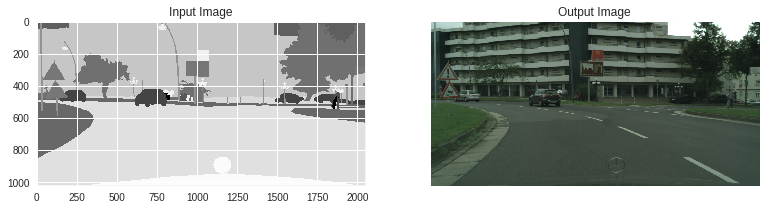

In [0]:
#choose a random image and compare
 
import random
file_name = random.choice(os.listdir('./cityscapes/data/train'))
tmg_=u'/content/cityscapes/data/train/'+ file_name
smg_=u'/content/cityscapes/data/trainannot/' + file_name
tmg = mpimg.imread(tmg_)
smg = mpimg.imread(smg_)

figure = plt.figure(figsize=(20, 10))
plt.subplot(1, 3, 1)
plt.title('Input Image')
#plt.axis('off')
plt.imshow(smg)
plt.subplot(1, 3, 2)
plt.title('Output Image')
plt.axis('off')
plt.imshow(tmg)
plt.show()

# Trash code


In [0]:
print(smg[500])

[0.01176471 0.01176471 0.01176471 ... 0.01176471 0.01176471 0.01176471]


In [0]:

smg_=u'/content/gtFine/train/aachen/aachen_000000_000019_gtFine_color.png'
smg = plt.imread(smg_)



In [0]:
print(smg.shape)

(1024, 2048, 4)


In [0]:
print(smg[500,1000,3]*255)

255.0


In [0]:
unique

array([  0.,  11.,  20.,  32.,  35.,  60.,  64.,  70., 107., 119., 128.,
       130., 142., 152., 153., 180., 220., 232., 244., 251., 255.],
      dtype=float32)

In [0]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

In [0]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [0]:
base = './cityscapes/data'
dirs = os.listdir(base)

In [0]:
os.listdir('./cityscapes/data/val')

In [0]:
path = './cityscapes/data/trainannot'
shutil.rmtree(path)
path = './cityscapes/data/testannot'
shutil.rmtree(path)
path = './cityscapes/data/valannot'
shutil.rmtree(path)

In [0]:
 "========= ENet Class Weights =========\n",
            " [50.217451520847895, 15.682810584684436, 30.763240156794012, 28.999931166192912, 30.41597086930706, 44.25029141503388, 31.628639849666783, 3.362088928135997, 14.031521298730318, 38.57652109952532, 46.36673899461991, 4.986657918172686, 39.254403222891234, 36.5125971773311, 50.28003422439059, 44.23756986418269, 49.18617193508105, 32.89620795239199, 50.29884199321097, 46.286660134462245, 40.69042748040039, 6.698241903441155, 33.55545414377673, 18.487832644189325, 32.97431249303082, 47.676506488107115, 12.70028597336979, 45.20542136324199, 45.78372411642551, 49.51878614176848, 49.982563625553624, 45.825290445040096, 48.40614734589367, 42.75592219573717]\n",
            "WARNING:tensorflow:From <ipython-input-11-063832bdf40e>:153: slice_input_producer (from tensorflow.python.training.input) is deprecated and will be removed in a future version.\n",
            "Instructions for updating:\n",
            "Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.Dataset.from_tensor_slices(tuple(tensor_list)).shuffle(tf.shape(input_tensor, out_type=tf.int64)[0]).repeat(num_epochs)`. If `shuffle=False`, omit the `.shuffle(...)`.\n",
            "WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/training/input.py:374: range_input_producer (from tensorflow.python.training.input) is deprecated and will be removed in a future version.\n",
            "Instructions for updating:\n",
            "Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.Dataset.range(limit).shuffle(limit).repeat(num_epochs)`. If `shuffle=False`, omit the `.shuffle(...)`.\n",
            "WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/training/input.py:320: input_producer (from tensorflow.python.training.input) is deprecated and will be removed in a future version.\n",
            "Instructions for updating:\n",
            "Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.Dataset.from_tensor_slices(input_tensor).shuffle(tf.shape(input_tensor, out_type=tf.int64)[0]).repeat(num_epochs)`. If `shuffle=False`, omit the `.shuffle(...)`.\n",
            "WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/training/input.py:190: limit_epochs (from tensorflow.python.training.input) is deprecated and will be removed in a future version.\n",
            "Instructions for updating:\n",
            "Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.Dataset.from_tensors(tensor).repeat(num_epochs)`.\n",
            "WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/training/input.py:199: QueueRunner.__init__ (from tensorflow.python.training.queue_runner_impl) is deprecated and will be removed in a future version.\n",
            "Instructions for updating:\n",
            "To construct input pipelines, use the `tf.data` module.\n",
            "WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/training/input.py:199: add_queue_runner (from tensorflow.python.training.queue_runner_impl) is deprecated and will be removed in a future version.\n",
            "Instructions for updating:\n",
            "To construct input pipelines, use the `tf.data` module.\n",
            "WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/training/input.py:202: to_float (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.\n",
            "Instructions for updating:\n",
            "Use tf.cast instead.\n",
            "WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/control_flow_ops.py:423: colocate_with (from tensorflow.python.framework.ops) is deprecated and will be removed in a future version.\n",
            "Instructions for updating:\n",
            "Colocations handled automatically by placer.\n",
            "WARNING:tensorflow:From <ipython-input-11-063832bdf40e>:163: batch (from tensorflow.python.training.input) is deprecated and will be removed in a future version.\n",
            "Instructions for updating:\n",
            "Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.Dataset.batch(batch_size)` (or `padded_batch(...)` if `dynamic_pad=True`).\n",
            "WARNING:tensorflow:From <ipython-input-9-861b5538d37b>:61: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.\n",
            "Instructions for updating:\n",
            "Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.\n",
            "WARNING:tensorflow:From <ipython-input-11-063832bdf40e>:185: get_or_create_global_step (from tensorflow.contrib.framework.python.ops.variables) is deprecated and will be removed in a future version.\n",
            "Instructions for updating:\n",
            "Please switch to tf.train.get_or_create_global_step\n",
            "WARNING:tensorflow:From <ipython-input-11-063832bdf40e>:203: streaming_accuracy (from tensorflow.contrib.metrics.python.ops.metric_ops) is deprecated and will be removed in a future version.\n",
            "Instructions for updating:\n",
            "Please switch to tf.metrics.accuracy. Note that the order of the labels and predictions arguments has been switched.\n",
            "WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/metrics_impl.py:259: to_int64 (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.\n",
            "Instructions for updating:\n",
            "Use tf.cast instead.\n",
            "WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/confusion_matrix.py:194: to_int32 (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.\n",
            "Instructions for updating:\n",
            "Use tf.cast instead.\n",
            "WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/metrics_impl.py:1155: div (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.\n",
            "Instructions for updating:\n",
            "Deprecated in favor of operator or tf.math.divide.\n",
            "WARNING:tensorflow:From <ipython-input-11-063832bdf40e>:291: Supervisor.__init__ (from tensorflow.python.training.supervisor) is deprecated and will be removed in a future version.\n",
            "Instructions for updating:\n",
            "Please switch to tf.train.MonitoredTrainingSession\n",
            "INFO:tensorflow:Running local_init_op.\n",
            "INFO:tensorflow:Done running local_init_op.\n",
            "INFO:tensorflow:Starting standard services.\n",
            "INFO:tensorflow:Saving checkpoint to path ./log/original/model.ckpt\n",
            "INFO:tensorflow:global_step/sec: 0\n",
            "INFO:tensorflow:Starting queue runners.\n",
            "INFO:tensorflow:Epoch 1.0/300\n",
            "INFO:tensorflow:Current Learning Rate: [0.0005]\n",
            "INFO:tensorflow:global step 0: loss: 33.5289 (18.62 sec/step)    Current Streaming Accuracy: 0.0000    Current Mean IOU: 0.0000\n",
            "global step %s: loss: %.4f (%.2f sec/step)    Current Streaming Accuracy: %.4f    Current Mean IOU: %.4f 0 33.528908 18.624133586883545 0.0 0.0\n",